共1797个samples


输出：
train_sizes-[ 161  403  806 1209 1612]，既那5个记录点的百分比对应的学习个数。
train_loss-5个。
test_loss-5。
学习误差：[-0. -0. -0. -0. -0.]
测试误差：[ 13.02983078   5.41292631   8.00192675   6.72970955   5.56857195]


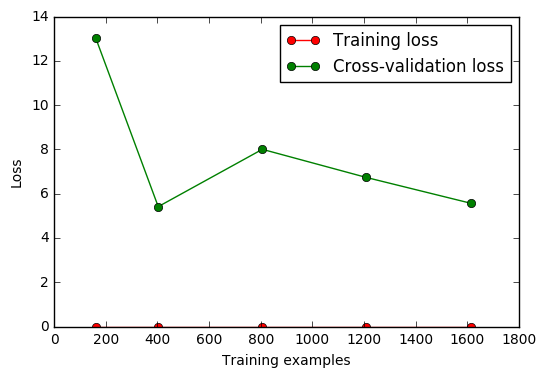

In [9]:
# coding=utf-8
"""
sklearn.learning_curve 中的 learning curve 可以很直观的看出我们的 model 学习的进度,
对比发现有没有 overfitting 的问题.然后我们可以对我们的 model 进行调整,克服 overfitting 的问题.

什么是overfitting：是一个问题，过于纠结training数据准确度，拟合有三种状态:
    1. 不拟合 under fit     Θ0 + Θ1x                                不能很好拟合的一次函数直线
    2. 拟合 just right     Θ0 + Θ1x + Θ2x²                        不错的二次函数曲线
    3. 过度拟合 over fit    Θ0 + Θ1x + Θ2x² + Θ3x³ + Θ4x(四次方)   完全拟合全部的点的弯曲线
好的fitting，应该随着traning， 误差值一直减小

此节：描述overfitting出现的过程，用了什么参数，出现了overfitting的问题，此时就要克服overfitting
下节：描述如何解决overfitting
"""

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import learning_curve  # 查看整个学习的过程，减小loss的过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC

digits = load_digits()
X = digits.data
y = digits.target

print('共%s个samples' % len(X))

"""
learning_curve 参数详解(其实是用了 cross_val_score方式，见p1_3.ipynb):

1. model
    gamma=0.001   好
    gamma=0.01    不好-因为overfitting了
4. cv 分成十组
5. neg_mean_squared_error 方差值，对比的误差值
6. train_sizes 在 10%， 25%， 50%， 75%， 100% 五个点，记录误差值

"""
# model = SVC(gamma=0.001)
model = SVC(gamma=0.01)
train_sizes, \
train_loss, test_loss = learning_curve(model, X, y, cv=10,
                                       scoring='neg_mean_squared_error',
                                       train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

print('输出：')
print('train_sizes-%s，既那%s个记录点的百分比对应的学习个数。' % (train_sizes, len(train_sizes)))
print('train_loss-%s个。' % len(train_loss))
print('test_loss-%s。' % len(test_loss))

train_loss_mean = -np.mean(train_loss, axis=1)  # 10组学习的平均误差：没误差，因为学的，就是考的
test_loss_mean = -np.mean(test_loss, axis=1)  # 10组测试的平均误差：应该要越来越低

print('学习误差：%s' % train_loss_mean)
print('测试误差：%s' % test_loss_mean)

# 红色：学习误差-几乎为0，因为学的本来就是对的。
plt.plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training loss")

# 绿色：测试误差。
plt.plot(train_sizes, test_loss_mean, 'o-', color="g", label="Cross-validation loss")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()